## 1-minute introduction to Jupyter ##

A Jupyter notebook consists of cells. Each cell contains either text or code.

A text cell will not have any text to the left of the cell. A code cell has `In [ ]:` to the left of the cell.

If the cell contains code, you can edit it. Press <kbd>Enter</kbd> to edit the selected cell. While editing the code, press <kbd>Enter</kbd> to create a new line, or <kbd>Shift</kbd>+<kbd>Enter</kbd> to run the code. If you are not editing the code, select a cell and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd> to run the code.

---

# Lesson 6b: Files and Directories; the `os` module

We have written a few programs involving the reading of files. So far, these files are all in the same directory as the script. What if the files are in a different directory?

(**Note:** For the purposes of this lesson, "folder" has the same meaning as "directory")

## The working directory

The directory that the python script is *working* in is called the **working directory**.

In Python, we can find out the **c**urrent **w**orking **d**irectory using the `getcwd()` function from the `os` module:

In [ ]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)

If a python script is launched from the commandline, the working directory is usually the directory that the script was launched from. For instance, if I copy the Python code above to a Python file, `check_cwd.py`, and run it from Powershell, this is what I will see in the Powershell terminal window:

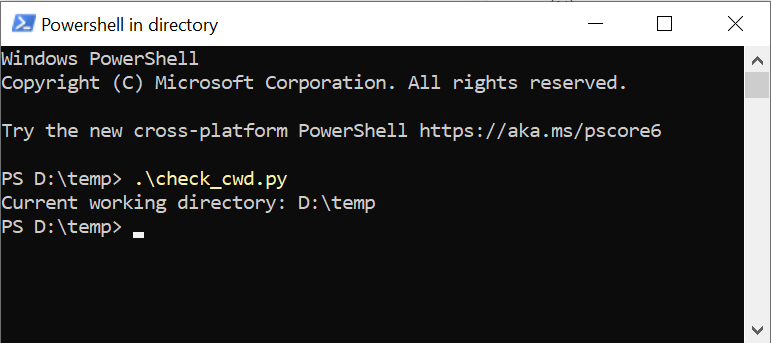
<center>Figure 1: Powershell running the `check_cwd.py` script</center>

It is not always the case that the working directory is the directory that a script is launched from, though. For example, a user who wishes to process a directory of files may store their Python script separately from the files, and launch that script in the directory where the files are located.

In the screenshot below, the script `process_files.py` is supposed to open files in `myfiles`, while not being in the same directory.

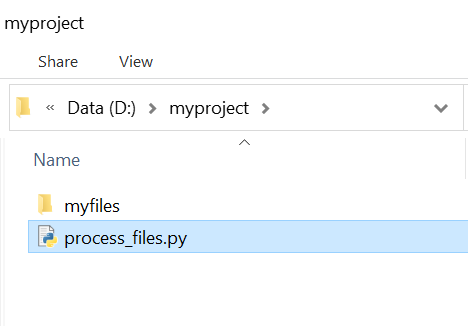
<center>Figure 2: The `myfiles` directory, within `D:\myproject`</center>

### Changing the working directory

We can change the working directory using the `chdir()` function from the `os` module.

In [ ]:
# process_files.py

import os

cwd = os.getcwd()
print("Current working directory:", cwd)

os.chdir("myfiles")
cwd = os.getcwd()
print("New working directory:", cwd)

In Jupyter notebook, the above code will only work once. That's because we passed a *relative path* to `os.chdir()`, which then changes the working directory. Subsequently, our new working directory does not have a `myfiles` directory within itself, causing a `FileNotFoundError` to be raised.

## Absolute and relative paths

We refer to other files and directories by their **path**.

Within `process_files.py`, we can reference the directory `myfiles` with two kinds of paths.

### Absolute paths

An absolute path *fully describes* how to access a file/directory from a **drive root**.
- In Windows, the drive root is one of the drive letters (e.g. `C:\` or `D:\`).
- On Linux and in MacOS, the drive root is `/`.

For the above screenshot, the absolute path of the `myfiles` directory is `D:\myproject\myfiles`.

### Relative paths

An absolute path describes how to access a file/directory from another directory.

The following symbols have special meaning in relative paths:
- `.` (single period): the current directory
- `..` (double period): the parent directory

For the above screenshot, the path of the `myfiles` directory *relative to* `D:\myproject` is `.\myfiles`. The path of `D:\myproject` *relative to* `D:\myproject\myfiles` is `..`.

## Creating directories in Python

Let's go ahead and create the above directories. We do so using the `os.mkdir()` function:

In [ ]:
os.mkdir("D:\myproject")

The directory `myproject` has now been created in `D:\`. Attempting to run the above cell again will result in a `FileExistsError`; `mkdir()` can only create directories if they don't exist yet.

We can check for an existing directory before creating it using `os.path.isdir()`:

In [ ]:
dirpath = "D:\myproject"
if os.path.isdir(dirpath):
    print("Directory already exists")
else:
    os.mkdir(dirpath)

## Exercise 1

1. Change your working directory to `myproject`.
2. Create a subdirectory, `myfiles`, within `myproject`.  
   Checking for the existence of the directory before creating.

In [ ]:
# Write your code below

dirpath = "D:\myproject"
if os.path.isdir(dirpath):
    print("Directory already exists")
else:
    os.mkdir(dirpath)

### Recursive directory creation

If you are creating nested directories, it can be a pain to have to check for and create each parent directory before creating the required subdirectories. Python provides an `os.makedirs()` function that does this for you:

In [ ]:
os.makedirs("D:\myproject\myfiles\user1\day1\morning")

## Caveat: directory separators in Windows

You might have noticed that in Python, we escape some symbols using the `\` backslash. For example, we use `\n` to represent a line break (since it cannot be represented with the alphabet letters). These specially escaped symbols are called **escape sequences**.

Some escape sequences have no meaning, e.g. `\m`, which is why a command like `os.mkdir("D:\myproject")` causes no problems. However, in the above code cell, `\u` is an escape sequence for some Unicode code points (see https://docs.python.org/3/howto/unicode.html#unicode-literals-in-python-source-code).

This causes some annoying problems that are specific to Windows; MacOS and Linux users do not face this problem since their OS uses `/` (forward slash) for directory separators.

### Mitigation 1: use forward slash

One way to work around this is to follow MacOS and Linux users in using forward slash:

In [ ]:
# Remember to delete these directories after you (accidentally) create them

os.makedirs("D:/myproject/myfiles/user1/day1/morning")

### Mitigation 2: use double-backslashes

Another way is to *escape the backslashes* with `\\`:

In [ ]:
# Remember to delete these directories after you (accidentally) create them

os.makedirs("D:\\myproject\\myfiles\\user1\\day1\\morning")

## Handling file and directory names in Python

Official Python reference: https://docs.python.org/3.6/library/os.path.html

You have met `os.path.isdir()` earlier, which checks if a given (absolute or relative) path is a directory. `os.path.isfile()` does the same for files:

In [ ]:
filename = 'data.txt'
if os.path.isfile(filename):
    with open(filename, 'r') as f:
        data = f.read()
else:
    print("No such file")

It is a lot of trouble to try to split a path into its components, especially since you don't always know which separator (`/` or `\\`) is being used.

Python also provides some functions in the `os.path` module to make this easier.

`os.path.split()` separates the last (i.e. right-most) component from the rest of the path, returning the `dirname` (the left part) and the `basename` (the right part) in the return value as a tuple:

In [ ]:
path = "D:/myproject/myfiles/user1/day1/morning/data.txt"
print(os.path.split(path))

You can use tuple unpacking (covered in more detail in Lesson 7b) to get the `dirname` and `basename` directly:

In [ ]:
path = "D:/myproject/myfiles/user1/day1/morning/data.txt"
dirname, basename = os.path.split(path)
print(dirname)
print(basename)

(try replacing the `/` forward slashes with `\\` escaped backslashes and see how the above function works.)

If you only need the `dirname` or `basename`, Python also provides them as functions in `os.path`:

In [ ]:
path = "D:/myproject/myfiles/user1/day1/morning/data.txt"
print(os.path.dirname(path))
print(os.path.basename(path))

If you want to separate a filename from its file extension, use the `os.path.splitext()` function:

In [ ]:
path = "D:/myproject/myfiles/user1/day1/morning/data.txt"
print(os.path.splitext(path))

# It works for relative paths and filenames too
filename = "data.txt"
print(os.path.splitext(filename))

After splitting up a path, you will usually make changes to it, removing or adding components, before trying to reassemble it. Python provides the `os.path.join()` function for you to do so:

In [ ]:
print(os.path.join("D:/myproject/", "myfiles", "user1", "day1", "morning", "data.txt"))

Python automatically determines the appropriate separator to use, selecting `/` for Linux and MacOS, and `\` for Windows. However, it will not check the arguments to `os.path.join()` and replace the separators for you, resulting in what you see in the code cell.

(While ugly-looking and possibly a pain to deal with, this path will still work in the `os.path` functions provided in Python.)

## Exercise 2

1. Write a Python function, `get_filename()` that:
   - Prompts the user for the path to a file
   - If the path does not point to an existing file, print an error message and prompt the user again
   - Return the path if the file exists.
.
2. Write a Python function, `get_filename(ext)` that:
   - Prompts the user for the path to a file
   - If the path does have the correct file extension matching the `ext` argument, print an appropriate message and prompt the user again
   - If the path does not point to an existing file, print an error message and prompt the user again
   - Return the path if the file exists.

**Example**

```
>>> get_filename(".txt")
Enter the path to a file: D:/myproject/myfiles/data.py
Invalid file extension
Enter the path to a file: D:/myproject/myfiles/data.txt
File does not exist
Enter the path to a file: D:/myproject/myfiles/user1/data.txt
'D:/myproject/myfiles/user1/data.txt'
```